In [1]:
import pandas as pd
import preprocessing as pp
from sklearn.model_selection import train_test_split
import utils as utils
import keras
from keras.regularizers import l2
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.models import load_model
pd.set_option('mode.chained_assignment', None)
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
from sklearn.pipeline import Pipeline
from keras.wrappers.scikit_learn import KerasClassifier

In [15]:
import random
seed = 100
np.random.seed(seed)
random.seed(seed)
import tensorflow
tensorflow.random.set_seed(seed)
import os
os.environ['PYTHONHASHSEED']=str(seed)

In [3]:
X, y = utils.importar_datos()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, 
                                                    random_state=pp.RANDOM_STATE, stratify=y)

In [5]:
preprocessor = pp.PreprocessingSE()

### Modelo 1

- Preprocesamiento con StandarScaler
- 3 Capas (8, 4 y 4 neuronas)
- Optimizador Adamax
- Función activación capas intermedias: `relu`
- Función activación capa final: `sigmoid`

In [24]:
def red_1():
    model = Sequential()
    model.add(Dense(8, input_dim=14, activation='relu'))
    model.add(Dense(4, activation='relu'))
    model.add(Dense(4, activation='relu'))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(loss='binary_crossentropy', optimizer='Adamax', metrics=['accuracy'])
    return model

#### Gráfico accuracy vs epoch

In [25]:
model = red_1()
history = model.fit(
        preprocessor.fit_transform(X_train), y_train, epochs=1000, 
        validation_data=(preprocessor.transform(X_test), y_test), verbose=0
    )

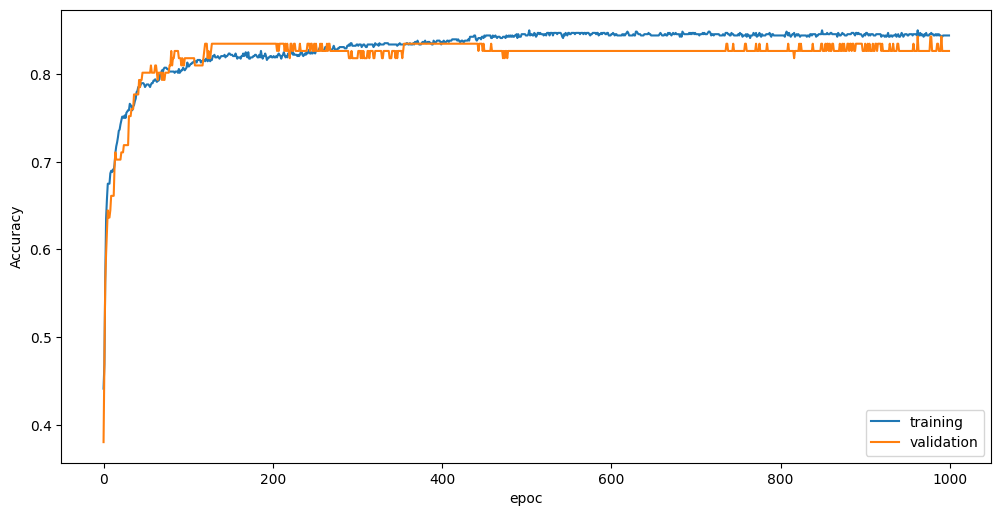

In [26]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.ylabel("Accuracy")
plt.xlabel("epoc")
plt.plot(history.history["accuracy"], label="training")
plt.plot(history.history["val_accuracy"], label="validation")
plt.legend()

#### Métricas

In [27]:
pipeline = Pipeline([("preprocessor", pp.PreprocessingSE()), 
                     ("model", KerasClassifier(red_1, epochs=600, verbose=0))
                     ])

In [28]:
scores = utils.metricas_cross_validation_con_cross_validate(X, y, pipeline)

Mean test roc auc is: 0.8472, standard deviation is: 0.0249
mean test accuracy is: 0.8028, standard deviation is: 0.0168
mean test precision is: 0.7873, standard deviation is: 0.0416
mean test recall is: 0.6712, standard deviation is: 0.0503
mean test f1_score is: 0.7223, standard deviation is: 0.0254


### Modelo 2

- Preprocesamiento con StandarScaler
- 2 Capas (8 y 4 neuronas)
- Optimizador Adam
- Función activación capas intermedias: `tanh`
- Función activación capa final: `sigmoid`
- Regularización L2

In [29]:
def red_2():
    model = Sequential()
    model.add(Dense(8, input_dim=14, activation='tanh', kernel_regularizer=l2(0.01)))
    model.add(Dense(4, activation='tanh', kernel_regularizer=l2(0.01)))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
    return model

#### Gráfico accuracy vs epoch

In [30]:
model = red_2()
history = model.fit(
    preprocessor.fit_transform(X_train), y_train, epochs=600, 
    validation_data=(preprocessor.transform(X_test), y_test), verbose=0
)

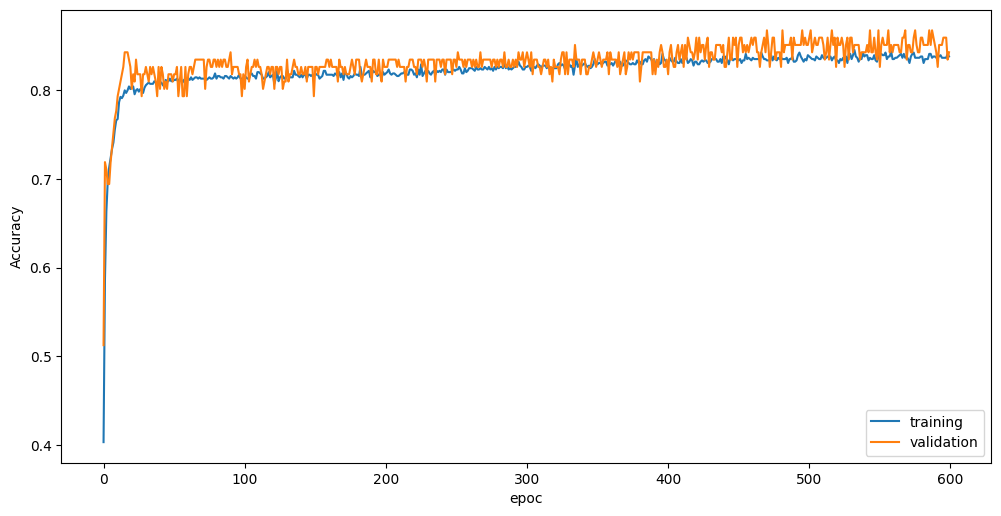

In [31]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.ylabel("Accuracy")
plt.xlabel("epoc")
plt.plot(history.history["accuracy"], label="training")
plt.plot(history.history["val_accuracy"], label="validation")
plt.legend()

#### Métricas

In [32]:
pipeline = Pipeline([("preprocessor", pp.PreprocessingSE()), 
                     ("model", KerasClassifier(red_2, epochs=600, verbose=0))
                     ])

In [33]:
scores = utils.metricas_cross_validation_con_cross_validate(X, y, pipeline)

Mean test roc auc is: 0.8628, standard deviation is: 0.0253
mean test accuracy is: 0.8178, standard deviation is: 0.0316
mean test precision is: 0.8071, standard deviation is: 0.0564
mean test recall is: 0.6942, standard deviation is: 0.0475
mean test f1_score is: 0.7451, standard deviation is: 0.0418


### Modelo 3

- Preprocesamiento con StandarScaler
- 2 Capas (8 y 4 neuronas)
- Optimizador Adam
- Función activación capas intermedias: `tanh`
- Función activación capa final: `sigmoid`

In [34]:
def red_3():
    model = Sequential()
    model.add(Dense(8, input_dim=14, activation='tanh'))
    model.add(Dense(4, activation='tanh'))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
    return model

#### Gráfico accuracy vs epoch

In [35]:
model = red_3()
history = model.fit(
    preprocessor.fit_transform(X_train), y_train, epochs=600, 
    validation_data=(preprocessor.transform(X_test), y_test), verbose=0
)

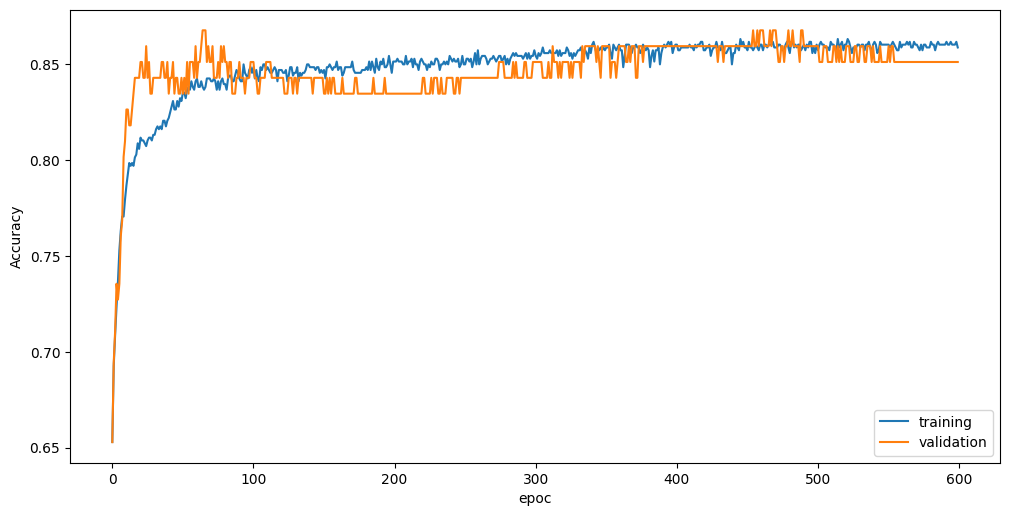

In [36]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.ylabel("Accuracy")
plt.xlabel("epoc")
plt.plot(history.history["accuracy"], label="training")
plt.plot(history.history["val_accuracy"], label="validation")
plt.legend()

#### Métricas

In [37]:
pipeline = Pipeline([("preprocessor", pp.PreprocessingSE()), 
                     ("model", KerasClassifier(red_3, epochs=600, verbose=0))
                     ])

In [38]:
scores = utils.metricas_cross_validation_con_cross_validate(X, y, pipeline)

Mean test roc auc is: 0.8460, standard deviation is: 0.0375
mean test accuracy is: 0.8140, standard deviation is: 0.0234
mean test precision is: 0.8097, standard deviation is: 0.0412
mean test recall is: 0.6745, standard deviation is: 0.0316
mean test f1_score is: 0.7356, standard deviation is: 0.0314


### Modelo 4

- Preprocesamiento con StandarScaler
- 3 Capas (8, 4 y 4 neuronas)
- Optimizador Adam
- Función activación capas intermedias: `relu`
- Función activación capa final: `sigmoid`

In [39]:
def red_4():
    model = Sequential()
    model.add(Dense(8, input_dim=14, activation='relu'))
    model.add(Dense(4, activation='relu'))
    model.add(Dense(4, activation='relu'))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
    return model

#### Gráfico accuracy vs epoch

In [40]:
model = red_4()
history = model.fit(
    preprocessor.fit_transform(X_train), y_train, epochs=600, 
    validation_data=(preprocessor.transform(X_test), y_test), verbose=0
)

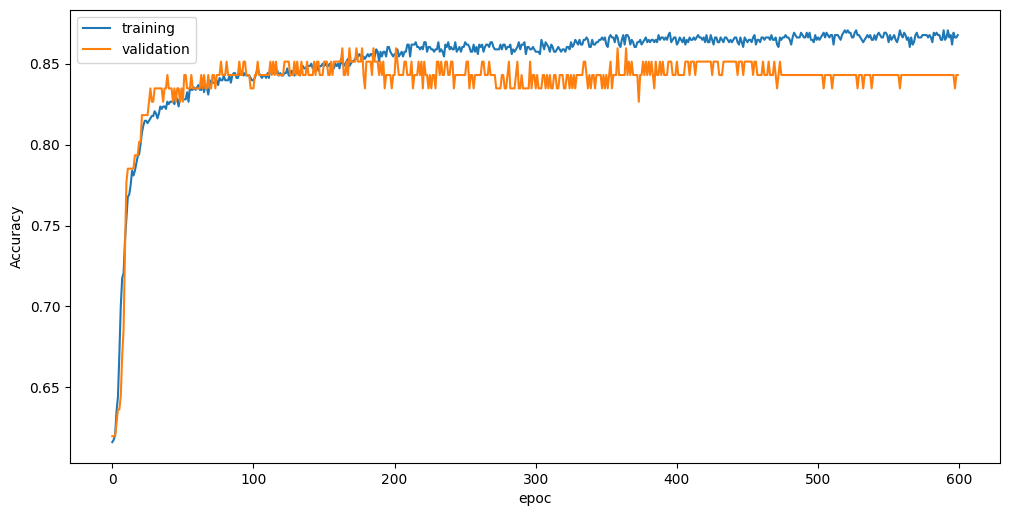

In [41]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.ylabel("Accuracy")
plt.xlabel("epoc")
plt.plot(history.history["accuracy"], label="training")
plt.plot(history.history["val_accuracy"], label="validation")
plt.legend()

In [42]:
pipeline = Pipeline([("preprocessor", pp.PreprocessingSE()), 
                     ("model", KerasClassifier(red_4, epochs=600, verbose=0))
                     ])

In [43]:
scores = utils.metricas_cross_validation_con_cross_validate(X, y, pipeline)

Mean test roc auc is: 0.8404, standard deviation is: 0.0336
mean test accuracy is: 0.8015, standard deviation is: 0.0289
mean test precision is: 0.7887, standard deviation is: 0.0565
mean test recall is: 0.6648, standard deviation is: 0.0370
mean test f1_score is: 0.7202, standard deviation is: 0.0344


### Modelo 5

- Preprocesamiento con StandarScaler
- 3 Capas (8, 4 y 4 neuronas)
- Optimizador Adam
- Función activación capas intermedias: `relu`
- Función activación capa final: `sigmoid`
- Regularización L2

In [44]:
def red_5():
    model = Sequential()
    model.add(Dense(8, input_dim=14, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dense(4, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dense(4, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
    return model

#### Gráfico accuracy vs epoch

In [45]:
model = red_5()
history = model.fit(
    preprocessor.fit_transform(X_train), y_train, epochs=600, 
    validation_data=(preprocessor.transform(X_test), y_test), verbose=0
)

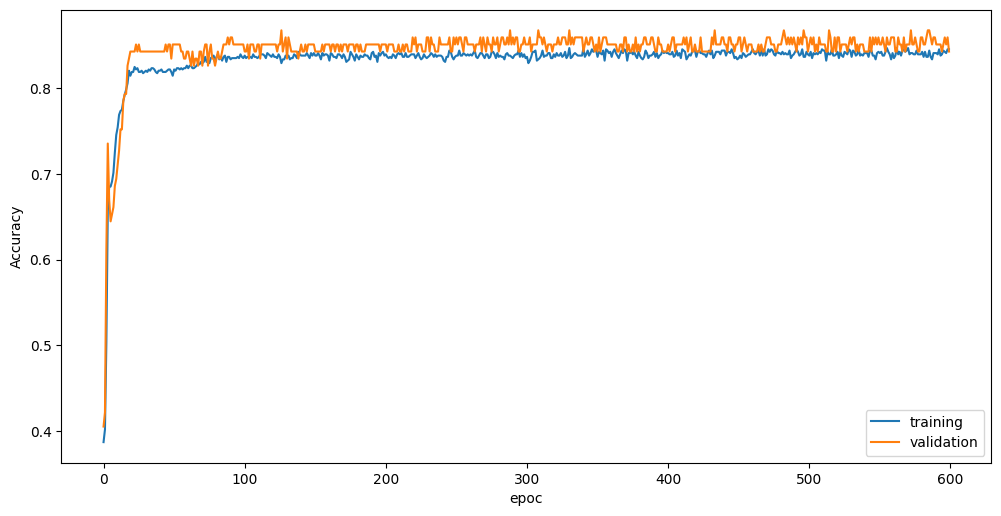

In [46]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.ylabel("Accuracy")
plt.xlabel("epoc")
plt.plot(history.history["accuracy"], label="training")
plt.plot(history.history["val_accuracy"], label="validation")
plt.legend()

#### Métricas

In [47]:
pipeline = Pipeline([("preprocessor", pp.PreprocessingSE()), 
                     ("model", KerasClassifier(red_5, epochs=600, verbose=0))
                     ])

In [48]:
scores = utils.metricas_cross_validation_con_cross_validate(X, y, pipeline)

Mean test roc auc is: 0.8591, standard deviation is: 0.0262
mean test accuracy is: 0.8165, standard deviation is: 0.0250
mean test precision is: 0.8191, standard deviation is: 0.0593
mean test recall is: 0.6743, standard deviation is: 0.0358
mean test f1_score is: 0.7383, standard deviation is: 0.0322


### Modelo 6

- Preprocesamiento con StandarScaler
- 2 Capas (32 y 16 neuronas)
- Optimizador Adam
- Función activación capas intermedias: `tanh`
- Función activación capa final: `sigmoid`
- Regularización L2

In [49]:
def red_6():
    model = Sequential()
    model.add(Dense(32, input_dim=14, activation='tanh', kernel_regularizer=l2(0.01)))
    model.add(Dense(16, activation='tanh', kernel_regularizer=l2(0.01)))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
    return model

#### Gráfico accuracy vs epoch

In [50]:
model = red_6()
history = model.fit(
    preprocessor.fit_transform(X_train), y_train, epochs=600, 
    validation_data=(preprocessor.transform(X_test), y_test), verbose=0
)

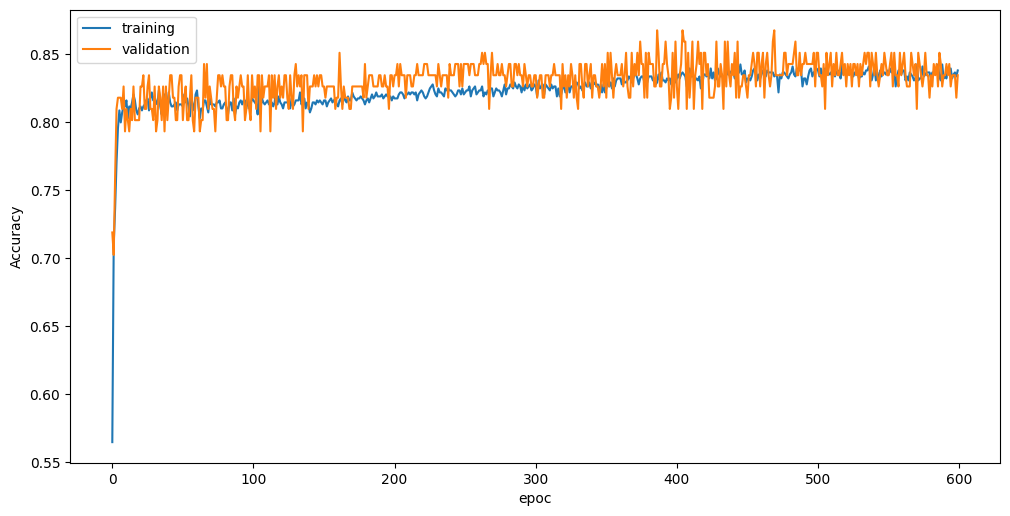

In [51]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.ylabel("Accuracy")
plt.xlabel("epoc")
plt.plot(history.history["accuracy"], label="training")
plt.plot(history.history["val_accuracy"], label="validation")
plt.legend()

#### Métricas

In [52]:
pipeline = Pipeline([("preprocessor", pp.PreprocessingSE()), 
                     ("model", KerasClassifier(red_6, epochs=600, verbose=0))
                     ])

In [53]:
scores = utils.metricas_cross_validation_con_cross_validate(X, y, pipeline)

Mean test roc auc is: 0.8564, standard deviation is: 0.0208
mean test accuracy is: 0.8165, standard deviation is: 0.0254
mean test precision is: 0.8023, standard deviation is: 0.0522
mean test recall is: 0.6975, standard deviation is: 0.0559
mean test f1_score is: 0.7440, standard deviation is: 0.0362


### Modelo 7

- Preprocesamiento con StandarScaler
- 3 Capas (64, 32, 32 neuronas)
- Dropout 0.25
- Optimizador Adam con lr=0.0001
- Función activación capas intermedias: `relu`
- Función activación capa final: `sigmoid`
- Regularización L2

In [54]:
def red_7():
    model = Sequential()
    model.add(Dense(64, input_dim=14, activation='relu'))
    model.add(Dropout(0.20))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.20))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.20))
    model.add(Dense(1, activation="sigmoid"))
    opt = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

#### Gráfico accuracy vs epoch

In [55]:
model = red_7()
history = model.fit(
    preprocessor.fit_transform(X_train), y_train, epochs=600, 
    validation_data=(preprocessor.transform(X_test), y_test), verbose=0
)

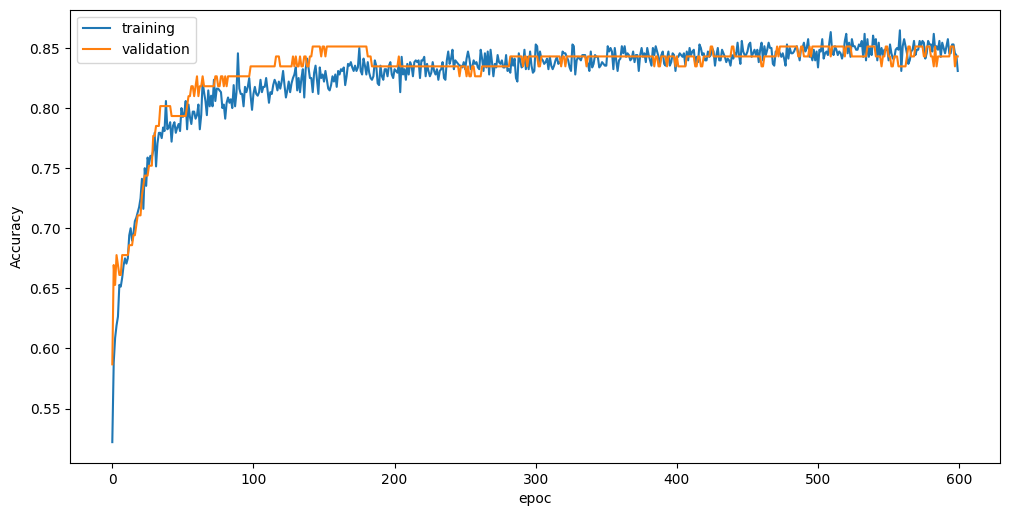

In [56]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.ylabel("Accuracy")
plt.xlabel("epoc")
plt.plot(history.history["accuracy"], label="training")
plt.plot(history.history["val_accuracy"], label="validation")
plt.legend()

#### Métricas

In [57]:
pipeline = Pipeline([("preprocessor", pp.PreprocessingSE()), 
                     ("model", KerasClassifier(red_7, epochs=600, verbose=0))
                     ])

In [58]:
scores = utils.metricas_cross_validation_con_cross_validate(X, y, pipeline)

Mean test roc auc is: 0.8572, standard deviation is: 0.0227
mean test accuracy is: 0.8127, standard deviation is: 0.0171
mean test precision is: 0.8063, standard deviation is: 0.0305
mean test recall is: 0.6741, standard deviation is: 0.0380
mean test f1_score is: 0.7336, standard deviation is: 0.0272


### Modelo 8

- Preprocesamiento con StandarScaler
- 3 Capas (8, 4 y 4 neuronas)
- Optimizador SGD
- Función activación capas intermedias: `relu`
- Función activación capa final: `sigmoid`
- Regularización L2

In [6]:
def red_8():
    model = Sequential()
    model.add(Dense(8, input_dim=14, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dense(4, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dense(4, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])
    return model

#### Gráfico accuracy vs epoch

In [7]:
model = red_8()
history = model.fit(
    preprocessor.fit_transform(X_train), y_train, epochs=600, 
    validation_data=(preprocessor.transform(X_test), y_test), verbose=0
)

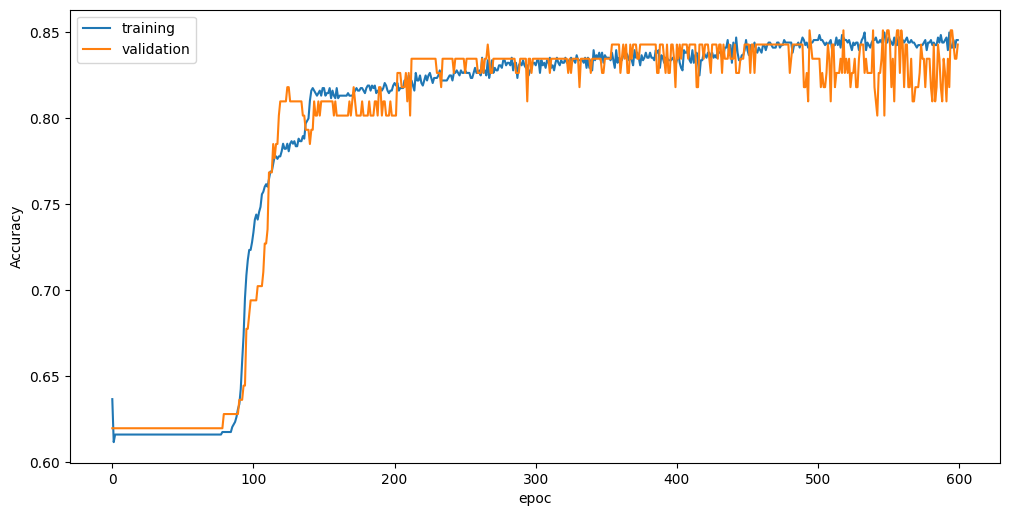

In [8]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.ylabel("Accuracy")
plt.xlabel("epoc")
plt.plot(history.history["accuracy"], label="training")
plt.plot(history.history["val_accuracy"], label="validation")
plt.legend()

#### Métricas

In [9]:
pipeline = Pipeline([("preprocessor", pp.PreprocessingSE()), 
                     ("model", KerasClassifier(red_8, epochs=600, verbose=0))
                     ])

In [10]:
scores = utils.metricas_cross_validation_con_cross_validate(X, y, pipeline)

Mean test roc auc is: 0.8595, standard deviation is: 0.0215
mean test accuracy is: 0.8240, standard deviation is: 0.0256
mean test precision is: 0.8340, standard deviation is: 0.0569
mean test recall is: 0.6809, standard deviation is: 0.0431
mean test f1_score is: 0.7480, standard deviation is: 0.0339


### Metricas finales

Se eligió el Modelo 8 en base a los resultados obtenidos mediante `cross_validation`.

In [20]:
pipeline = Pipeline([("preprocessor", pp.PreprocessingSE()), 
                     ("model", KerasClassifier(red_8, epochs=600, verbose=0))
                     ])

AUC_ROC,Accuracy,Precision,Recall,F1 Score
0.874493,0.834711,0.861111,0.673913,0.756098


Matriz de confusión:


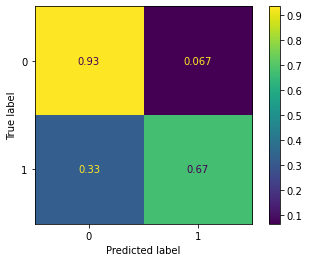

In [21]:
pipeline = utils.entrenar_y_realizar_prediccion_final_con_metricas(X, y, pipeline)

Aclaración: Se setearon todos los seeds que se encontraron en la documentación de Keras para lograr resultados reproducibles, sin embargo no se pudo lograr que las metricas no varien en las distintas ejecuciones.

### Predicción HoldOut

In [22]:
utils.predecir_holdout_y_generar_csv(pipeline, 'Predicciones/8-RedNeuronal.csv')